# Deep learning


## This tutorial

In this tutorial we will explore some basic deep learning. As before this is an interractive tutorial so after we introduce a concept we will let you experiement with some tasks and learning by doing. 

We will use two datasets the one we use for the examples is called MNIST (https://en.wikipedia.org/wiki/MNIST_database) and it is composed of figures like 

![title](images/MnistExamples.png)

each of which is encoded with 28x28 pixels and comes with a label attached that represents which digits that image contains. 

Meanwhile the dataset you will use in the execises is a subset of the Quick!Draw! dataset created by Google (https://github.com/googlecreativelab/quickdraw-dataset)and it is composed of figures like

![title](images/QuickDraw.jpg)

## Loading the data

In [36]:
import torch
from torchvision import datasets, transforms

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='./data', train=True,
                          download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False,
                          download=True, transform=transform)

In [35]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                          shuffle=False, num_workers=2)

## Defining our model

### Fully connected

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class FCNet(nn.Module):
    def __init__(self):
        self.input_size = 28*28
        
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(self.input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = FCNet()
net

FCNet(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Defining the loss function

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training

In [21]:
nb_epochs = 20

In [22]:
import numpy as np
loss_epochs = np.empty(nb_epochs)

In [32]:
for epoch in range(nb_epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    
    average_loss = running_loss / len(trainloader)
    loss_epochs[epoch] = average_loss
    
    print(f'Epoch: {epoch} ===> Loss: {average_loss}')

print('Finished Training')

Epoch: 0 ===> Loss: 0.009068627800055159
Epoch: 1 ===> Loss: 0.00881536879169289
Epoch: 2 ===> Loss: 0.008522477977482292
Epoch: 3 ===> Loss: 0.008330650689798252
Epoch: 4 ===> Loss: 0.008091479853416482
Epoch: 5 ===> Loss: 0.007896879347778546
Epoch: 6 ===> Loss: 0.007674086875922513
Epoch: 7 ===> Loss: 0.007512261573574506
Epoch: 8 ===> Loss: 0.007325040311455571
Epoch: 9 ===> Loss: 0.007042127434688155
Epoch: 10 ===> Loss: 0.006920947629938988
Epoch: 11 ===> Loss: 0.0066627528996711285
Epoch: 12 ===> Loss: 0.006514880115961811
Epoch: 13 ===> Loss: 0.0063373622718305945
Epoch: 14 ===> Loss: 0.00624163850103893
Epoch: 15 ===> Loss: 0.006047018334211316
Epoch: 16 ===> Loss: 0.005937572974168385
Epoch: 17 ===> Loss: 0.005761319144803565
Epoch: 18 ===> Loss: 0.005640596626132416
Epoch: 19 ===> Loss: 0.0055113996596386034
Finished Training


## Plotting

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


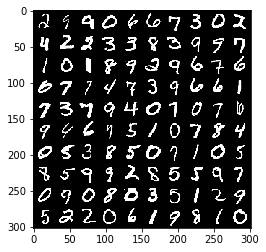

In [26]:
from torchvision.utils import make_grid

dataiter = iter(testloader)
images, labels = dataiter.next()

img = images.view((-1, 1, 28, 28))
grid = make_grid(img, nrow=10)

# print images
show(grid)

In [27]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [28]:
predicted.view(10,10)

tensor([[2, 9, 9, 0, 6, 6, 7, 3, 0, 2],
        [4, 2, 2, 3, 3, 8, 3, 9, 9, 7],
        [1, 0, 1, 8, 9, 2, 9, 6, 7, 6],
        [0, 7, 7, 4, 7, 3, 9, 6, 6, 1],
        [7, 3, 7, 9, 4, 0, 7, 0, 7, 8],
        [9, 4, 6, 7, 5, 1, 0, 7, 8, 4],
        [0, 5, 3, 8, 5, 0, 7, 1, 0, 5],
        [8, 5, 9, 9, 2, 8, 5, 5, 9, 7],
        [0, 9, 0, 8, 0, 3, 5, 1, 2, 9],
        [5, 2, 2, 0, 6, 1, 9, 8, 1, 0]])

## Accuracy

In [31]:
for i, data in enumerate(testloader):
    
    inputs, labels = data
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    
average_loss = running_loss / len(testloader)
print(f'Test accuracy: {average_loss}')

Test accuracy: 0.13304414354613983
